In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Things to vary, number of layers, elevation of the ground surface, thickness of layers, random noise on surfaces

In [4]:
#first is the angular unconformity geometry

In [7]:
elevation = np.full(200, 3.25)#+np.random.rand(200)/2
first = 3*np.sin(np.arange(0,20,0.1)/6.28)
second = 3*np.sin(np.arange(0,20,0.1)/6.28)+1.5
third = 3*np.sin(np.arange(0,20,0.1)/6.28)+1.65

first = np.where(first > elevation, elevation, first)
second = np.where(second > elevation, elevation, second)
third = np.where(third > elevation, elevation, third)


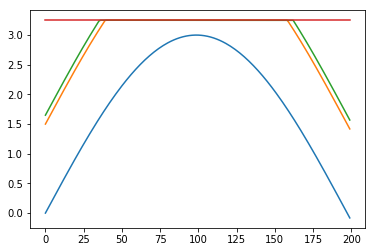

In [8]:
plt.plot(first)
plt.plot(second)
plt.plot(third)
plt.plot(elevation)


In [5]:
df =  pd.DataFrame()
df['elevation'] = elevation
df['third']=third
df['second'] = second
df['firsts'] = first

In [6]:
angular_thicknesses = df.T.diff(axis=0).abs().T
angular_thicknesses['mean'] = angular_thicknesses.copy().mean(axis=1)
angular_thicknesses['third_lag'] = angular_thicknesses.third.shift(1)
angular_thicknesses['second_lag'] = angular_thicknesses.second.shift(1)
angular_thicknesses['first_lag'] =angular_thicknesses.firsts.shift(1)

angular_thicknesses = angular_thicknesses.drop(columns=['elevation']).dropna()

In [7]:
#now it's onlap geometry

In [8]:
onlap_first = np.where(3*np.sin(np.arange(0,20,0.1)/6.28) > elevation, elevation, 3*np.sin(np.arange(0,20,0.1)/6.28))
onlap_second = np.where(np.where(np.full(200,0.5) > onlap_first, np.full(200,0.5), onlap_first) > elevation, elevation, np.where(np.full(200,0.5) > onlap_first, np.full(200,0.5), onlap_first))
onlap_third = np.where(np.where(np.full(200,0.65) > onlap_first, np.full(200,0.65), onlap_first) > elevation, elevation, np.where(np.full(200,0.65) > onlap_first, np.full(200,0.65), onlap_first))

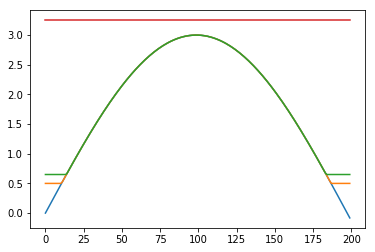

In [9]:
plt.plot(onlap_first)
plt.plot(onlap_second)
plt.plot(onlap_third)
plt.plot(elevation)

In [10]:
dfo =  pd.DataFrame()
dfo['elevation'] = elevation
dfo['third']=onlap_third
dfo['second'] = onlap_second
dfo['firsts'] = onlap_first

In [11]:
onlap_thicknesses = dfo.T.diff(axis=0).abs().T
onlap_thicknesses['mean'] = onlap_thicknesses.copy().mean(axis=1)
onlap_thicknesses['third_lag'] = onlap_thicknesses.third.shift(1)
onlap_thicknesses['second_lag'] = onlap_thicknesses.second.shift(1)
onlap_thicknesses['first_lag'] =onlap_thicknesses.firsts.shift(1)

onlap_thicknesses = onlap_thicknesses.drop(columns=['elevation']).dropna()

In [12]:
horizontal_first = np.full(200, 0)+np.random.rand(200)/100
horizontal_second = np.full(200, 0.5)+np.random.rand(200)/100
horizontal_third = np.full(200,0.65)+np.random.rand(200)/100

dfh =  pd.DataFrame()
dfh['elevation'] = elevation
dfh['third'] = horizontal_third
dfh['second'] = horizontal_second
dfh['firsts'] = horizontal_first

horizontal_thicknesses = dfh.T.diff(axis=0).abs().T
horizontal_thicknesses['mean'] = horizontal_thicknesses.copy().mean(axis=1)
horizontal_thicknesses['third_lag'] = horizontal_thicknesses.third.shift(1)
horizontal_thicknesses['second_lag'] = horizontal_thicknesses.second.shift(1)
horizontal_thicknesses['first_lag'] =horizontal_thicknesses.firsts.shift(1)

horizontal_thicknesses = horizontal_thicknesses.drop(columns=['elevation']).dropna()

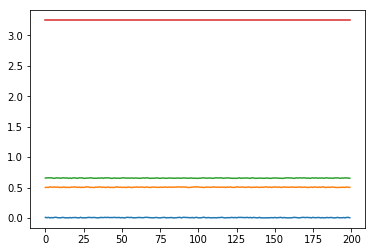

In [13]:
plt.plot(horizontal_first)
plt.plot(horizontal_second)
plt.plot(horizontal_third)
plt.plot(elevation)

In [14]:
normalized_df=(angular_thicknesses-angular_thicknesses.min())/(angular_thicknesses.max()-angular_thicknesses.min())
normalized_dfo=(onlap_thicknesses-onlap_thicknesses.min())/(onlap_thicknesses.max()-onlap_thicknesses.min())
normalized_dfh=(horizontal_thicknesses-horizontal_thicknesses.min())/(horizontal_thicknesses.max()-horizontal_thicknesses.min())

normalized_dfo['class'] = 1
normalized_df['class'] = 0
normalized_dfh['class'] = 2

In [15]:
dataset = pd.concat((normalized_df, normalized_dfo, normalized_dfh))

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataset.iloc[0:,0:7].values, dataset.iloc[0:,7].values, test_size=0.1, random_state=86)

In [17]:
from keras.utils import to_categorical
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)
type(y_train_encoded)

C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


numpy.ndarray

In [18]:
np.argmax(y_train_encoded, axis = 1)

array([2, 0, 0, 1, 2, 2, 1, 2, 1, 1, 1, 2, 0, 2, 2, 1, 2, 1, 1, 0, 2, 1,
       2, 0, 0, 0, 1, 2, 0, 2, 1, 1, 0, 1, 2, 0, 1, 0, 2, 2, 0, 0, 0, 1,
       0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 1, 1, 1, 2, 0, 2, 1, 2, 0, 0, 2, 0,
       0, 2, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 0, 2, 1, 1, 2, 2, 0, 2, 0, 0,
       1, 2, 1, 0, 0, 1, 2, 0, 1, 2, 0, 2, 1, 1, 0, 1, 1, 2, 1, 2, 2, 2,
       1, 1, 2, 1, 1, 1, 0, 1, 2, 1, 0, 1, 0, 2, 2, 0, 1, 0, 1, 0, 0, 2,
       1, 0, 0, 2, 0, 0, 2, 0, 1, 2, 1, 0, 2, 1, 2, 2, 2, 2, 0, 1, 2, 0,
       2, 1, 2, 0, 2, 1, 0, 2, 0, 1, 2, 0, 0, 1, 2, 1, 1, 0, 0, 1, 0, 0,
       2, 2, 0, 0, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 1, 2, 1, 2, 0, 2, 1, 0,
       2, 2, 2, 2, 0, 0, 0, 0, 2, 1, 1, 1, 2, 2, 1, 2, 0, 2, 1, 1, 0, 0,
       0, 2, 0, 1, 0, 2, 0, 2, 1, 0, 2, 1, 2, 2, 2, 0, 1, 1, 1, 0, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 0, 0, 1, 1, 1, 1, 1, 2, 1, 2, 0,
       0, 0, 0, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 0, 1, 0, 0, 2, 0, 2, 0, 1,
       0, 1, 0, 0, 2, 2, 0, 2, 1, 0, 2, 0, 1, 0, 1,

In [19]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

In [27]:
model = Sequential()
model.add(Dense(100, input_shape=(7,), kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(3, kernel_initializer='normal', activation='relu'))
model.add(Dense(3, kernel_initializer='normal', activation='sigmoid'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [28]:
model.fit(X_train, y_train_encoded, epochs=200, batch_size=20)

Epoch 1/200
537/537 [==============================] - 0s 652us/step - loss: 1.0981 - acc: 0.3389
Epoch 2/200
537/537 [==============================] - 0s 54us/step - loss: 1.0946 - acc: 0.3464
Epoch 3/200
537/537 [==============================] - 0s 54us/step - loss: 1.0832 - acc: 0.3575
Epoch 4/200
537/537 [==============================] - 0s 53us/step - loss: 1.0548 - acc: 0.5717
Epoch 5/200
537/537 [==============================] - 0s 54us/step - loss: 1.0104 - acc: 0.5531
Epoch 6/200
537/537 [==============================] - 0s 55us/step - loss: 0.9694 - acc: 0.5922
Epoch 7/200
537/537 [==============================] - 0s 56us/step - loss: 0.9390 - acc: 0.6555
Epoch 8/200
537/537 [==============================] - 0s 65us/step - loss: 0.9128 - acc: 0.6685
Epoch 9/200
537/537 [==============================] - 0s 62us/step - loss: 0.8856 - acc: 0.7169
Epoch 10/200
537/537 [==============================] - 0s 52us/step - loss: 0.8533 - acc: 0.7281
Epoch 11/200
537/537 [======

537/537 [==============================] - 0s 50us/step - loss: 0.0791 - acc: 0.9888
Epoch 168/200
537/537 [==============================] - 0s 50us/step - loss: 0.0809 - acc: 0.9795
Epoch 169/200
537/537 [==============================] - 0s 50us/step - loss: 0.0714 - acc: 0.9851
Epoch 170/200
537/537 [==============================] - 0s 48us/step - loss: 0.0786 - acc: 0.9814
Epoch 171/200
537/537 [==============================] - 0s 52us/step - loss: 0.0842 - acc: 0.9814
Epoch 172/200
537/537 [==============================] - 0s 50us/step - loss: 0.0737 - acc: 0.9851
Epoch 173/200
537/537 [==============================] - 0s 50us/step - loss: 0.0768 - acc: 0.9870
Epoch 174/200
537/537 [==============================] - 0s 50us/step - loss: 0.0768 - acc: 0.9795
Epoch 175/200
537/537 [==============================] - 0s 50us/step - loss: 0.0709 - acc: 0.9832
Epoch 176/200
537/537 [==============================] - 0s 50us/step - loss: 0.0786 - acc: 0.9832
Epoch 177/200
537/537 [=

In [29]:
score=model.evaluate(X_test, y_test_encoded)

60/60 [==============================] - 0s 701us/step


In [30]:
score

[0.07630496670802435, 0.9666666547457378]